In [1]:
# testing the base code (you can jump to #Start of notebook)


In [2]:

password = "postgre123"
from data_challenge import my_db

import pandas as pd
my_db = my_db(password)

In [12]:
my_db.delete_all()

rows deleted


'ok'

In [3]:
all = my_db.read_all()

In [4]:
df_csv = pd.read_csv("trips.csv")

In [6]:
my_db.add_rows(df_csv)

my_db.read_all()

started adding rows..
rows added


[(107661,
  '2030250',
  'A048710',
  'A048583',
  'PV23',
  '2020JJ00',
  58,
  657,
  16.5,
  37),
 (107662,
  '2030220',
  'A048709',
  'T001093',
  'PV30',
  '2019JJ00',
  107,
  2208,
  50.1,
  2474),
 (107663,
  '2030170',
  'A048710',
  'A018984',
  'PV31',
  '2022JJ00',
  34,
  169,
  14.2,
  1924),
 (107664,
  '2030220',
  'A048709',
  'A018982',
  'PV20',
  '2020JJ00',
  None,
  None,
  None,
  618),
 (107665,
  '2030220',
  'A048710',
  'A048584',
  'PV26',
  '2021JJ00',
  18,
  665,
  11.9,
  3153),
 (107666,
  '2030240',
  'A048709',
  'A018984',
  'PV30',
  '2021JJ00',
  14,
  253,
  24.6,
  1965),
 (107667,
  '2030250',
  'A048710',
  'A018982',
  'PV25',
  '2021JJ00',
  None,
  None,
  None,
  3190),
 (107668,
  '2030190',
  'A048710',
  'A018985',
  'PV23',
  '2018JJ00',
  None,
  None,
  None,
  1713),
 (107669,
  '2030220',
  'A048709',
  'A048584',
  'PV20',
  '2022JJ00',
  18,
  701,
  12.5,
  2733),
 (107670,
  '2030190',
  'A048709',
  'A048584',
  'PV26',
  '202

In [13]:
len(my_db.read_all())

0

In [5]:
from data_challenge import my_df

In [6]:
my_df = my_df(all)

In [7]:
my_df.clean()

cleaning..
Dropping 0 negatives
Dropping 4 negatives
Dropping 4 negatives
Dropping 0 outliers
Dropping 9 outliers
Dropping 7 outliers
Dropped 0 invalid motives rows
Dropped 42 invalid population rows
Dropped 32 invalid region rows
Dropped 0 invalid periods rows


'ok'

In [8]:
my_df.add_labels()

'ok'

In [9]:
my_df.generate_csv()

qn1.csv and qn1b.csv saved
qn2.csv saved
qn3.csv and qn3b.csv saved
qn4.csv saved


c:\Users\carlo\Downloads\challenge\data\data_challenge.py:274: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res1 = df.sort_values("level_urbanization")[df['TravelMotives'] == '2030200'].groupby(['Periods', 'mode', 'level_urbanization'], as_index=False)['ID'].count()
c:\Users\carlo\Downloads\challenge\data\data_challenge.py:276: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res1b = df.sort_values("level_urbanization")[df['TravelMotives'] == '2030200'].groupby(['Periods', 'mode', 'level_urbanization'], as_index=False)['Trip_in_a_year'].sum()
c:\Users\carlo\Downloads\challenge\data\data_challenge.py:295: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  topbike = df[df['Population'] == 'A048709'][df['TravelModes'] == 'A018984'].groupby('UserId')[['Km_travelled_in_a_year']].sum().sort_values(by = 'Km_travelled_in_a_year', ascending = False).head(8)
c:\Users\carlo\Downloads\challenge\data\data_chall

'ok'

In [ ]:
# Start of notebook

In [2]:
import psycopg2 
import pandas as pd

conn = psycopg2.connect(
    host="localhost",
    database="trips",
    user="postgres",
    password="postgre123")

cur = conn.cursor()


In [3]:
df_csv = pd.read_csv("trips.csv")

In [4]:
def process_row(all_values):
    all_values = [str(x).strip() if len(str(x).strip()) > 1 else None for x in all_values][1:]
    new_row = []
    if all_values[0]:
        new_row.append(str(all_values[0]))
    else:
        new_row.append(None)

    if all_values[1]:
        new_row.append(str(all_values[1]))
    else:
        new_row.append(None)

    if all_values[2]:
        new_row.append(str(all_values[2]))
    else:
        new_row.append(None)

    if all_values[3]:
        new_row.append(str(all_values[3]))
    else:
        new_row.append(None)

    if all_values[4]:
        new_row.append(str(all_values[4]))
    else:
        new_row.append(None)

    if all_values[5]:
        new_row.append(int(all_values[5]))
    else:
        new_row.append(None)

    if all_values[6]:
        new_row.append(int(all_values[6]))
    else:
        new_row.append(None)

    if all_values[7]:
        new_row.append(float(all_values[7]))
    else:
        new_row.append(None)

    if all_values[8]:
        new_row.append(int(all_values[8]))
    else:
        new_row.append(None)


    return new_row

In [9]:
# cur.execute("""
#     CREATE TABLE trips2(
# id serial PRIMARY KEY,
# TravelMotives  text,
# Population text,
# TravelModes text,
# RegionCharacteristics  text,
# Periods  text,
# Trip_in_a_year integer,
# Km_travelled_in_a_year   integer, 
# Hours_travelled_in_a_year  real, 
# UserId  integer
# )
# """)


for i in range(len(df_csv)):
    try:
        unprocessed_row =  list(df_csv.values[i])
        new_row = process_row(unprocessed_row)
        cur.execute('''INSERT INTO trips2
            (TravelMotives  ,
            Population ,
            TravelModes ,
            RegionCharacteristics  ,
            Periods  ,
            Trip_in_a_year ,
            Km_travelled_in_a_year   , 
            Hours_travelled_in_a_year  , 
            UserId  )
            VALUES ( %s, %s, %s, %s, %s, %s, %s, %s, %s)''', tuple(new_row))
    except:
        print('error', new_row)

conn.commit()


# cur.execute('SELECT * FROM trips')
# one = cur.fetchone()
# all = cur.fetchall()
# all


In [5]:
cur.execute('SELECT * FROM trips2')
all = cur.fetchall()
all


[(26161,
  '2030250',
  'A048710',
  'A048583',
  'PV23',
  '2020JJ00',
  58,
  657,
  16.5,
  37),
 (26162,
  '2030220',
  'A048709',
  'T001093',
  'PV30',
  '2019JJ00',
  107,
  2208,
  50.1,
  2474),
 (26163,
  '2030170',
  'A048710',
  'A018984',
  'PV31',
  '2022JJ00',
  34,
  169,
  14.2,
  1924),
 (26164,
  '2030220',
  'A048709',
  'A018982',
  'PV20',
  '2020JJ00',
  None,
  None,
  None,
  618),
 (26165,
  '2030220',
  'A048710',
  'A048584',
  'PV26',
  '2021JJ00',
  18,
  665,
  11.9,
  3153),
 (26166,
  '2030240',
  'A048709',
  'A018984',
  'PV30',
  '2021JJ00',
  14,
  253,
  24.6,
  1965),
 (26167,
  '2030250',
  'A048710',
  'A018982',
  'PV25',
  '2021JJ00',
  None,
  None,
  None,
  3190),
 (26168,
  '2030190',
  'A048710',
  'A018985',
  'PV23',
  '2018JJ00',
  None,
  None,
  None,
  1713),
 (26169,
  '2030220',
  'A048709',
  'A048584',
  'PV20',
  '2022JJ00',
  18,
  701,
  12.5,
  2733),
 (26170,
  '2030190',
  'A048709',
  'A048584',
  'PV26',
  '2022JJ00',
  

In [39]:
# cur = conn.cursor()
# cur.execute('DELETE FROM trips2')
# conn.commit()



In [40]:
df_csv

,Unnamed: 0,TravelMotives,Population,TravelModes,RegionCharacteristics,Periods,Trip in a year,Km travelled in a year,Hours travelled in a year,UserId
0,0,2030250,A048710,A048583,PV23,2020JJ00,58,657,16.5,37
1,1,2030220,A048709,T001093,PV30,2019JJ00,107,2208,50.1,2474
2,2,2030170,A048710,A018984,PV31,2022JJ00,34,169,14.2,1924
3,3,2030220,A048709,A018982,PV20,2020JJ00,.,.,.,618
4,4,2030220,A048710,A048584,PV26,2021JJ00,18,665,11.9,3153
...,...,...,...,...,...,...,...,...,...,...
8715,8715,2030200,A048709,T001093,PV30,2020JJ00,216,984,44.1,950
8716,8716,2030190,A048710,A018981,PV28,2022JJ00,.,.,.,2292
8717,8717,2030230,A048709,A018986,PV23,2020JJ00,.,.,.,1434
8718,8718,2030250,A048709,A048583,PV31,2021JJ00,66,649,17.9,1336


In [6]:
df = pd.DataFrame(all, columns=['ID',	'TravelMotives',	'Population',	'TravelModes',
                           	'RegionCharacteristics'	,'Periods',	'Trip_in_a_year',
                                	'Km_travelled_in_a_year',	'Hours_travelled_in_a_year'	,'UserId'])
df

,ID,TravelMotives,Population,TravelModes,RegionCharacteristics,Periods,Trip_in_a_year,Km_travelled_in_a_year,Hours_travelled_in_a_year,UserId
0,26161,2030250,A048710,A048583,PV23,2020JJ00,58.0,657.0,16.5,37.0
1,26162,2030220,A048709,T001093,PV30,2019JJ00,107.0,2208.0,50.1,2474.0
2,26163,2030170,A048710,A018984,PV31,2022JJ00,34.0,169.0,14.2,1924.0
3,26164,2030220,A048709,A018982,PV20,2020JJ00,NaN,NaN,NaN,618.0
4,26165,2030220,A048710,A048584,PV26,2021JJ00,18.0,665.0,11.9,3153.0
...,...,...,...,...,...,...,...,...,...,...
8715,34876,2030200,A048709,T001093,PV30,2020JJ00,216.0,984.0,44.1,950.0
8716,34877,2030190,A048710,A018981,PV28,2022JJ00,NaN,NaN,NaN,2292.0
8717,34878,2030230,A048709,A018986,PV23,2020JJ00,NaN,NaN,NaN,1434.0
8718,34879,2030250,A048709,A048583,PV31,2021JJ00,66.0,649.0,17.9,1336.0


In [7]:
df.nunique(), df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720 entries, 0 to 8719
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         8720 non-null   int64  
 1   TravelMotives              8720 non-null   object 
 2   Population                 8720 non-null   object 
 3   TravelModes                8720 non-null   object 
 4   RegionCharacteristics      8720 non-null   object 
 5   Periods                    8720 non-null   object 
 6   Trip_in_a_year             3511 non-null   float64
 7   Km_travelled_in_a_year     4051 non-null   float64
 8   Hours_travelled_in_a_year  4135 non-null   float64
 9   UserId                     8700 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 681.4+ KB


(ID                           8720
 TravelMotives                   9
 Population                     13
 TravelModes                     8
 RegionCharacteristics          15
 Periods                         5
 Trip_in_a_year                218
 Km_travelled_in_a_year       1487
 Hours_travelled_in_a_year     831
 UserId                       3228
 dtype: int64,
 (8720, 10),
 None)

In [8]:
# data cleaning
df.isna().sum() , df.isnull().sum()

(ID                              0
 TravelMotives                   0
 Population                      0
 TravelModes                     0
 RegionCharacteristics           0
 Periods                         0
 Trip_in_a_year               5209
 Km_travelled_in_a_year       4669
 Hours_travelled_in_a_year    4585
 UserId                         20
 dtype: int64,
 ID                              0
 TravelMotives                   0
 Population                      0
 TravelModes                     0
 RegionCharacteristics           0
 Periods                         0
 Trip_in_a_year               5209
 Km_travelled_in_a_year       4669
 Hours_travelled_in_a_year    4585
 UserId                         20
 dtype: int64)

In [9]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html('report.html', open_browser=False)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report report.html was generated.


<AxesSubplot:>

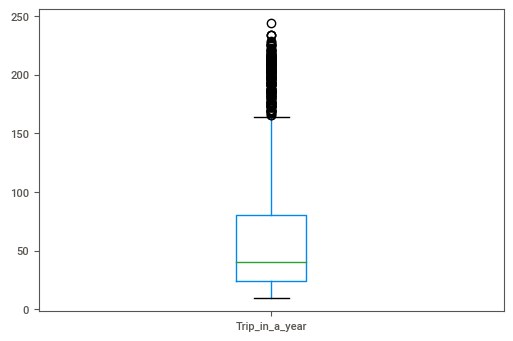

In [10]:
stats = ['Trip_in_a_year'	,'Km_travelled_in_a_year',	'Hours_travelled_in_a_year']

df.boxplot(column =[stats[0]], grid = False)

<AxesSubplot:>

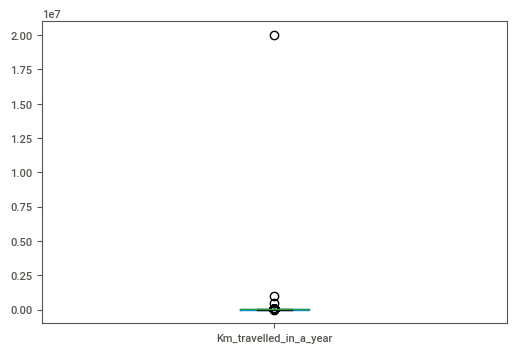

In [11]:
df.boxplot(column =[stats[1]], grid = False)

<AxesSubplot:>

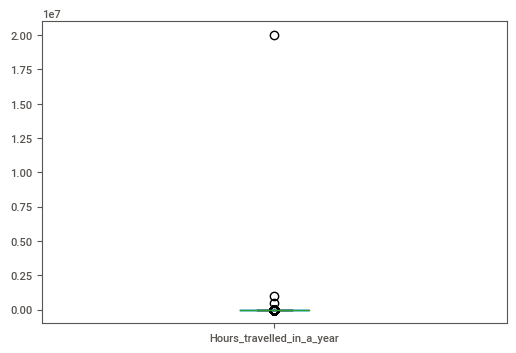

In [12]:
df.boxplot(column =[stats[2]], grid = False)

In [13]:
import plotly.express as px
fig = px.scatter_matrix(df[stats])
fig.show()
fig.write_html("file.html")

In [14]:
# dropping negatives
for s in stats:
    negatives = df[(df[s] < 0)]
    print('Dropping', len(negatives), 'negatives')
    df = df.drop(negatives.index)


Dropping 0 negatives
Dropping 4 negatives
Dropping 4 negatives


In [15]:
for s in stats:
    # calculate IQR 
    Q1 = df[s].quantile(0.25)
    Q3 = df[s].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 5
    outliers = df[(df[s] < Q1 - threshold * IQR) | (df[s] > Q3 + threshold * IQR)]
    

    # dropping outliers
    print('Dropping', len(outliers), 'outliers')
    df = df.drop(outliers.index)




Dropping 0 outliers
Dropping 9 outliers
Dropping 7 outliers


In [16]:
# add the area as a column
urbanization = pd.read_csv('urbanization_level.csv', delimiter=';')
urbanization


,Unnamed: 0,provinces,level_urbanization,area
0,0,Noord-Holland (PV),Extremely urbanised,Noord-Nederland (LD)
1,1,Utrecht (PV),Strongly urbanised,West-Nederland (LD)
2,2,Noord-Brabant (PV),Strongly urbanised,Zuid-Nederland (LD)
3,3,Gelderland (PV),Moderately urbanised\t,Oost-Nederland (LD)
4,4,Limburg (PV),Moderately urbanised,Zuid-Nederland (LD)
5,5,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD)
6,6,Flevoland (PV),Moderately urbanised,West-Nederland (LD)
7,7,Groningen (PV),Hardly urbanised,Noord-Nederland (LD)
8,8,Drenthe (PV),Hardly urbanised,Noord-Nederland (LD)
9,9,Fryslân (PV),Hardly urbanised,Noord-Nederland (LD)


In [17]:
regions = pd.read_csv('region.csv')
regions

,code,region,description
0,PV20,Groningen (PV),PV = Province Administrative classification of...
1,PV21,Fryslân (PV),PV = Province Administrative classification of...
2,PV22,Drenthe (PV),PV = Province Administrative classification of...
3,PV23,Overijssel (PV),PV = Province Administrative classification of...
4,PV24,Flevoland (PV),PV = Province Administrative classification of...
5,PV25,Gelderland (PV),PV = Province Administrative classification of...
6,PV26,Utrecht (PV),PV = Province Administrative classification of...
7,PV27,Noord-Holland (PV),PV = Province Administrative classification of...
8,PV28,Zuid-Holland (PV),PV = Province Administrative classification of...
9,PV29,Zeeland (PV),PV = Province Administrative classification of...


In [18]:
region_info = pd.merge(urbanization, regions, left_on = "provinces", right_on = "region", how=  'right')
region_info['code'] = region_info['code'].apply(lambda x: x.strip())

In [19]:
df = pd.merge(df, region_info, left_on='RegionCharacteristics', right_on='code')

In [20]:
travel_motives = list(pd.read_csv('travel_motives.csv')['code'])
travel_motives = [str(x) for x in travel_motives]
travel_motives

['2030170',
 '2030190',
 '2030200',
 '2030210',
 '2030220',
 '2030230',
 '2030240',
 '2030250',
 '2820740']

In [21]:
travel_modes = list(pd.read_csv('travel_mode.csv', delimiter = '|')['code'])
travel_modes = [str(x) for x in travel_modes]
travel_modes

['A048583', 'A048584', 'A018981', 'A018982', 'A018984', 'A018985', 'A018986']

In [22]:

# cleaning invalid rows

# 'TravelMotives', 'Population', 'TravelModes', 'RegionCharacteristics', 'Periods'
before = df.shape[0]
df = df[df['TravelMotives'].isin(travel_motives)]
after = df.shape[0]
print('Dropped', before-after, 'rows')

# cleaning row with invalid population code
before = df.shape[0]
df = df[df['Population'].isin(['A048710', 'A048709'])]
after = df.shape[0]
print('Dropped', before-after, 'rows')


# df[~df['TravelModes'].isin(travel_modes)].groupby('TravelModes').count()
# there is a travel mode that is not in the metadata file, but I'll keep is because it's associated with > 1k rows

Dropped 0 rows
Dropped 42 rows


In [23]:
# cleaning wrong regions

before = df.shape[0]
df = df[df['RegionCharacteristics'].isin(['PV23', 'PV30', 'PV31', 'PV20', 'PV26', 'PV25', 'PV29', 'PV21',   'PV28', 'PV27', 'PV24', 'PV22'])]
after = df.shape[0]
print('Dropped', before-after, 'rows')

df['RegionCharacteristics'].unique()



Dropped 0 rows


array(['PV23', 'PV30', 'PV31', 'PV20', 'PV26', 'PV25', 'PV29', 'PV21',
       'PV28', 'PV27', 'PV24', 'PV22'], dtype=object)

In [24]:
# cleaning wrong periods

before = df.shape[0]
df = df[df['Periods'].isin(['2020JJ00', '2019JJ00', '2022JJ00', '2021JJ00', '2018JJ00'])]
after = df.shape[0]
print('Dropped', before-after, 'rows')

df['Periods'].unique()

Dropped 0 rows


array(['2020JJ00', '2018JJ00', '2022JJ00', '2021JJ00', '2019JJ00'],
      dtype=object)

In [25]:
# I add labels from the metadata files

'TravelMotives', 'Population', 'TravelModes', 'RegionCharacteristics', 'Periods'

travel_motives = pd.read_csv('travel_motives.csv')
travel_motives['code'] = travel_motives['code'].apply(lambda x: str(x))
travel_motives

,code,motive,description
0,2030170,"Travel to/from work, (non)-daily commute",Trips to and from a permanent or a temporary w...
1,2030190,Services/care,Trips to a location where a form of service or...
2,2030200,"Shopping, groceries, funshopping.","Shopping, grocery shopping and fun shopping (f..."
3,2030210,Attending education/courses,Activities related to attending school and chi...
4,2030220,Visits including staying overnight,It involves visiting and possibly staying over...
5,2030230,"Leisure, sports",This includes sport-related trips such as (whe...
6,2030240,Touring/walking,"This mainly includes, in particular, recreatio..."
7,2030250,Other,These include the non-commercial //bringing an...
8,2820740,Professionally,"Business, professional. Business trips in the ..."


In [26]:
travel_mode = pd.read_csv('travel_mode.csv', delimiter = '|')
travel_mode

,code,mode,description
0,A048583,Passenger car (driver),This includes drivers of a passenger car (also...
1,A048584,Passenger car (passenger),Person who rides along in a passenger car (wit...
2,A018981,Train,"Includes: express train, stopping train, sprin..."
3,A018982,Bus/tram/metro,Bus: this includes only (scheduled) buses for ...
4,A018984,Bike,Bicycle: this includes: both a non-electric an...
5,A018985,Walking,This includes all travel on foot possibly with...
6,A018986,Other,NaN


In [27]:
population = pd.read_csv('population.csv')
population

,code,population
0,A048710,Population 35 years old or younger
1,A048709,Population: 36 years old or older


In [28]:
# adding travel motive labels
travel_motives['TravelMotives'] = travel_motives['code']
travel_motives
df = pd.merge(df, travel_motives[['motive', 'TravelMotives']], on = 'TravelMotives')

In [29]:
# adding travel mode labels


travel_mode['TravelModes'] = travel_mode['code']
df = pd.merge(df, travel_mode[['mode', 'TravelModes']], on = 'TravelModes')
df

,ID,TravelMotives,Population,TravelModes,RegionCharacteristics,Periods,Trip_in_a_year,Km_travelled_in_a_year,Hours_travelled_in_a_year,UserId,Unnamed: 0,provinces,level_urbanization,area,code,region,description,motive,mode
0,26161,2030250,A048710,A048583,PV23,2020JJ00,58.0,657.0,16.5,37.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver)
1,27954,2030250,A048710,A048583,PV23,2019JJ00,46.0,522.0,13.4,NaN,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver)
2,28131,2030250,A048709,A048583,PV23,2021JJ00,63.0,832.0,20.3,815.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver)
3,28504,2030250,A048710,A048583,PV23,2021JJ00,59.0,774.0,18.9,409.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver)
4,28925,2030250,A048709,A048583,PV23,2022JJ00,66.0,829.0,19.9,241.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7552,31213,2030210,A048709,A048584,PV22,2018JJ00,NaN,NaN,NaN,1253.0,8.0,Drenthe (PV),Hardly urbanised,Noord-Nederland (LD),PV22,Drenthe (PV),PV = Province Administrative classification of...,Attending education/courses,Passenger car (passenger)
7553,32969,2030210,A048710,A048584,PV22,2021JJ00,NaN,NaN,NaN,2363.0,8.0,Drenthe (PV),Hardly urbanised,Noord-Nederland (LD),PV22,Drenthe (PV),PV = Province Administrative classification of...,Attending education/courses,Passenger car (passenger)
7554,33146,2030210,A048709,A048584,PV22,2021JJ00,NaN,NaN,NaN,1101.0,8.0,Drenthe (PV),Hardly urbanised,Noord-Nederland (LD),PV22,Drenthe (PV),PV = Province Administrative classification of...,Attending education/courses,Passenger car (passenger)
7555,33177,2030210,A048710,A048584,PV22,2019JJ00,NaN,NaN,NaN,3287.0,8.0,Drenthe (PV),Hardly urbanised,Noord-Nederland (LD),PV22,Drenthe (PV),PV = Province Administrative classification of...,Attending education/courses,Passenger car (passenger)


In [30]:
# adding population labels

population['Population'] = population['code']
df = pd.merge(df, population[['population', 'Population']], on = 'Population')


In [31]:
# fixing error with level_urbanization

def stripstring(x):
    if x == "Moderately urbanised\t":
        x = "Moderately urbanised"
    return x

df['level_urbanization'] = df['level_urbanization'].apply(lambda x: stripstring(x))
df.head()

,ID,TravelMotives,Population,TravelModes,RegionCharacteristics,Periods,Trip_in_a_year,Km_travelled_in_a_year,Hours_travelled_in_a_year,UserId,Unnamed: 0,provinces,level_urbanization,area,code,region,description,motive,mode,population
0,26161,2030250,A048710,A048583,PV23,2020JJ00,58.0,657.0,16.5,37.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
1,27954,2030250,A048710,A048583,PV23,2019JJ00,46.0,522.0,13.4,NaN,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
2,28504,2030250,A048710,A048583,PV23,2021JJ00,59.0,774.0,18.9,409.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
3,30436,2030250,A048710,A048583,PV23,2022JJ00,61.0,767.0,18.4,1190.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
4,32225,2030250,A048710,A048583,PV23,2018JJ00,64.0,766.0,18.4,1871.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger


In [32]:
df['level_urbanization'].unique()

array(['Moderately urbanised', 'Strongly urbanised', 'Hardly urbanised',
       nan, 'Extremely urbanised'], dtype=object)

In [33]:
df.head()

,ID,TravelMotives,Population,TravelModes,RegionCharacteristics,Periods,Trip_in_a_year,Km_travelled_in_a_year,Hours_travelled_in_a_year,UserId,Unnamed: 0,provinces,level_urbanization,area,code,region,description,motive,mode,population
0,26161,2030250,A048710,A048583,PV23,2020JJ00,58.0,657.0,16.5,37.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
1,27954,2030250,A048710,A048583,PV23,2019JJ00,46.0,522.0,13.4,NaN,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
2,28504,2030250,A048710,A048583,PV23,2021JJ00,59.0,774.0,18.9,409.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
3,30436,2030250,A048710,A048583,PV23,2022JJ00,61.0,767.0,18.4,1190.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
4,32225,2030250,A048710,A048583,PV23,2018JJ00,64.0,766.0,18.4,1871.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger


In [34]:
# question 1


pd.set_option('display.max_rows', 500)

df['level_urbanization'] = pd.Categorical(df['level_urbanization'], [ 'Hardly urbanised', 'Moderately urbanised', 'Strongly urbanised', 'Extremely urbanised'])



In [35]:


# sort value is added level_urbanization is in the proper order

res1 = df.sort_values("level_urbanization")[df['TravelMotives'] == '2030200'].groupby(['Periods', 'mode', 'level_urbanization'], as_index=False)['ID'].count()
res1.to_csv('qn1.csv')


res1b = df.sort_values("level_urbanization")[df['TravelMotives'] == '2030200'].groupby(['Periods', 'mode', 'level_urbanization'], as_index=False)['Trip_in_a_year'].sum()
res1b.to_csv('qn1b.csv')
res1b.head(100)

c:\Users\carlo\Anaconda3\envs\rasa\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

c:\Users\carlo\Anaconda3\envs\rasa\lib\site-packages\ipykernel_launcher.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Periods,mode,level_urbanization,Trip_in_a_year
0,2018JJ00,Bike,Hardly urbanised,487.0
1,2018JJ00,Bike,Moderately urbanised,499.0
2,2018JJ00,Bike,Strongly urbanised,272.0
3,2018JJ00,Bike,Extremely urbanised,141.0
4,2018JJ00,Bus/tram/metro,Hardly urbanised,0.0
5,2018JJ00,Bus/tram/metro,Moderately urbanised,0.0
6,2018JJ00,Bus/tram/metro,Strongly urbanised,0.0
7,2018JJ00,Bus/tram/metro,Extremely urbanised,0.0
8,2018JJ00,Other,Hardly urbanised,0.0
9,2018JJ00,Other,Moderately urbanised,0.0


In [36]:
df['level_urbanization'].unique()

['Moderately urbanised', 'Strongly urbanised', 'Hardly urbanised', NaN, 'Extremely urbanised']
Categories (4, object): ['Hardly urbanised', 'Moderately urbanised', 'Strongly urbanised', 'Extremely urbanised']

In [37]:
# question 2

# filter only west regions
west_regions = ['PV26', 'PV24']
df_west = df[df['RegionCharacteristics'].isin(west_regions)]

# assuming across the whole period

bike_travellers = df_west[df_west['TravelModes'] == 'A018984'].groupby('UserId')[['Km_travelled_in_a_year']].sum().sort_values(by = 'Km_travelled_in_a_year', ascending = False)
bike_travellers.to_csv('qn2.csv')
bike_travellers.head(10)

,Km_travelled_in_a_year
UserId,
1449.0,638.0
2077.0,359.0
863.0,332.0
994.0,309.0
955.0,303.0
2574.0,295.0
1744.0,286.0
1199.0,282.0
166.0,278.0


In [38]:
df.head()

,ID,TravelMotives,Population,TravelModes,RegionCharacteristics,Periods,Trip_in_a_year,Km_travelled_in_a_year,Hours_travelled_in_a_year,UserId,Unnamed: 0,provinces,level_urbanization,area,code,region,description,motive,mode,population
0,26161,2030250,A048710,A048583,PV23,2020JJ00,58.0,657.0,16.5,37.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
1,27954,2030250,A048710,A048583,PV23,2019JJ00,46.0,522.0,13.4,NaN,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
2,28504,2030250,A048710,A048583,PV23,2021JJ00,59.0,774.0,18.9,409.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
3,30436,2030250,A048710,A048583,PV23,2022JJ00,61.0,767.0,18.4,1190.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
4,32225,2030250,A048710,A048583,PV23,2018JJ00,64.0,766.0,18.4,1871.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger


In [39]:
# question 3

# same but older (and not just west Netherlands)

In [40]:
topbike = df[df['Population'] == 'A048709'][df['TravelModes'] == 'A018984'].groupby('UserId')[['Km_travelled_in_a_year']].sum().sort_values(by = 'Km_travelled_in_a_year', ascending = False).head(8)
topbike.head()

c:\Users\carlo\Anaconda3\envs\rasa\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Km_travelled_in_a_year
UserId,
1373.0,738.0
1449.0,638.0
2077.0,597.0
3208.0,518.0
965.0,513.0


In [41]:
topbike = list(topbike.index.values)
qn3 = df[df['UserId'].isin(topbike)][df['Periods'] == '2022JJ00']
qn3.to_csv('qn3.csv')
qn3.head()


c:\Users\carlo\Anaconda3\envs\rasa\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,ID,TravelMotives,Population,TravelModes,RegionCharacteristics,Periods,Trip_in_a_year,Km_travelled_in_a_year,Hours_travelled_in_a_year,UserId,Unnamed: 0,provinces,level_urbanization,area,code,region,description,motive,mode,population
4001,32463,2030220,A048709,A048583,PV27,2022JJ00,31.0,937.0,17.4,1914.0,0.0,Noord-Holland (PV),Extremely urbanised,Noord-Nederland (LD),PV27,Noord-Holland (PV),PV = Province Administrative classification of...,Visits including staying overnight,Passenger car (driver),Population: 36 years old or older
4152,34188,2030200,A048709,A048583,PV20,2022JJ00,68.0,540.0,14.5,3208.0,7.0,Groningen (PV),Hardly urbanised,Noord-Nederland (LD),PV20,Groningen (PV),PV = Province Administrative classification of...,"Shopping, groceries, funshopping.",Passenger car (driver),Population: 36 years old or older
6805,29909,2030240,A048709,A018984,PV29,2022JJ00,26.0,473.0,48.0,1373.0,10.0,Zeeland (PV),Hardly urbanised,Zuid-Nederland (LD),PV29,Zeeland (PV),PV = Province Administrative classification of...,Touring/walking,Bike,Population: 36 years old or older


In [42]:
# same but for top 100

topbike = df[df['Population'] == 'A048709'][df['TravelModes'] == 'A018984'].groupby('UserId')[['Km_travelled_in_a_year']].sum().sort_values(by = 'Km_travelled_in_a_year', ascending = False).head(100)
topbike = list(topbike.index.values)

c:\Users\carlo\Anaconda3\envs\rasa\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [43]:
df.head()

,ID,TravelMotives,Population,TravelModes,RegionCharacteristics,Periods,Trip_in_a_year,Km_travelled_in_a_year,Hours_travelled_in_a_year,UserId,Unnamed: 0,provinces,level_urbanization,area,code,region,description,motive,mode,population
0,26161,2030250,A048710,A048583,PV23,2020JJ00,58.0,657.0,16.5,37.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
1,27954,2030250,A048710,A048583,PV23,2019JJ00,46.0,522.0,13.4,NaN,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
2,28504,2030250,A048710,A048583,PV23,2021JJ00,59.0,774.0,18.9,409.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
3,30436,2030250,A048710,A048583,PV23,2022JJ00,61.0,767.0,18.4,1190.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
4,32225,2030250,A048710,A048583,PV23,2018JJ00,64.0,766.0,18.4,1871.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger


In [44]:
qn3b = df[df['UserId'].isin(topbike)][df['Periods'] == '2022JJ00']


# common here is intended as how many trips are made 

qn3b = qn3b.groupby(['motive'], as_index=False)[['Trip_in_a_year']].sum().sort_values('Trip_in_a_year')
qn3b.to_csv('qn3b.csv')
qn3b.head()


c:\Users\carlo\Anaconda3\envs\rasa\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,motive,Trip_in_a_year
4,Services/care,14.0
3,Professionally,18.0
0,Attending education/courses,33.0
2,Other,54.0
8,Visits including staying overnight,100.0


In [45]:
df.head()

,ID,TravelMotives,Population,TravelModes,RegionCharacteristics,Periods,Trip_in_a_year,Km_travelled_in_a_year,Hours_travelled_in_a_year,UserId,Unnamed: 0,provinces,level_urbanization,area,code,region,description,motive,mode,population
0,26161,2030250,A048710,A048583,PV23,2020JJ00,58.0,657.0,16.5,37.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
1,27954,2030250,A048710,A048583,PV23,2019JJ00,46.0,522.0,13.4,NaN,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
2,28504,2030250,A048710,A048583,PV23,2021JJ00,59.0,774.0,18.9,409.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
3,30436,2030250,A048710,A048583,PV23,2022JJ00,61.0,767.0,18.4,1190.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger
4,32225,2030250,A048710,A048583,PV23,2018JJ00,64.0,766.0,18.4,1871.0,5.0,Overijssel (PV),Moderately urbanised,Oost-Nederland (LD),PV23,Overijssel (PV),PV = Province Administrative classification of...,Other,Passenger car (driver),Population 35 years old or younger


In [46]:
# question 4

going_to_edu = df[df['TravelMotives'] == '2030210']

going_to_edu.head()

going_to_edu_sums = going_to_edu




In [47]:
# for finding the people with least number of kms we need to remove the nas for kms and trips
going_to_edu_sums = going_to_edu[going_to_edu['Km_travelled_in_a_year'].notna()]
going_to_edu_sums = going_to_edu[going_to_edu['Trip_in_a_year'].notna()]


In [48]:
# going_to_edu_sums = going_to_edu_sums[going_to_edu_sums['Km_travelled_in_a_year'] > 0]
going_to_edu_sums = going_to_edu_sums.groupby('UserId').sum().sort_values('Km_travelled_in_a_year').head(10)
going_to_edu_sums

,ID,Trip_in_a_year,Km_travelled_in_a_year,Hours_travelled_in_a_year,Unnamed: 0
UserId,,,,,
41.0,30079,10.0,11.0,1.7,0.0
507.0,29972,11.0,12.0,1.4,2.0
877.0,33670,10.0,12.0,1.3,1.0
2873.0,27941,11.0,13.0,2.0,0.0
875.0,34754,10.0,14.0,1.8,1.0
2497.0,27647,10.0,14.0,1.4,2.0
2014.0,28265,11.0,15.0,1.8,0.0
1285.0,26506,11.0,16.0,3.0,0.0
2406.0,34109,12.0,16.0,2.0,0.0


In [49]:
dfq4.groupby('UserId').sum().sort_values('Km_travelled_in_a_year').head(15)

NameError: name 'dfq4' is not defined

In [303]:
ppl_q3 = list(going_to_edu_sums.head(10).index)
ppl_q3

[41.0, 507.0, 877.0, 2873.0, 875.0, 2497.0, 2014.0, 1285.0, 2406.0, 2795.0]

In [304]:
dfq4 = going_to_edu[going_to_edu['UserId'].isin(ppl_q3)]
dfq4

,ID,TravelMotives,Population,TravelModes,RegionCharacteristics,Periods,Trip_in_a_year,Km_travelled_in_a_year,Hours_travelled_in_a_year,UserId,Unnamed: 0,provinces,level_urbanization,area,code,region,description,motive,mode,population
1031,74267,2030210,A048710,A018985,PV30,2019JJ00,10.0,14.0,1.4,2497.0,2.0,Noord-Brabant (PV),Strongly urbanised,Zuid-Nederland (LD),PV30,Noord-Brabant (PV),PV = Province Administrative classification of...,Attending education/courses,Walking,Population 35 years old or younger
1034,76592,2030210,A048710,A018985,PV30,2018JJ00,11.0,12.0,1.4,507.0,2.0,Noord-Brabant (PV),Strongly urbanised,Zuid-Nederland (LD),PV30,Noord-Brabant (PV),PV = Province Administrative classification of...,Attending education/courses,Walking,Population 35 years old or younger
1048,80290,2030210,A048710,A018985,PV26,2018JJ00,10.0,12.0,1.3,877.0,1.0,Utrecht (PV),Strongly urbanised,West-Nederland (LD),PV26,Utrecht (PV),PV = Province Administrative classification of...,Attending education/courses,Walking,Population 35 years old or younger
1050,81374,2030210,A048710,A018985,PV26,2022JJ00,10.0,14.0,1.8,875.0,1.0,Utrecht (PV),Strongly urbanised,West-Nederland (LD),PV26,Utrecht (PV),PV = Province Administrative classification of...,Attending education/courses,Walking,Population 35 years old or younger
1066,74561,2030210,A048710,A018985,PV28,2021JJ00,11.0,13.0,2.0,2873.0,NaN,NaN,NaN,NaN,PV28,Zuid-Holland (PV),PV = Province Administrative classification of...,Attending education/courses,Walking,Population 35 years old or younger
1067,74885,2030210,A048710,A018985,PV28,2022JJ00,11.0,15.0,1.8,2014.0,NaN,NaN,NaN,NaN,PV28,Zuid-Holland (PV),PV = Province Administrative classification of...,Attending education/courses,Walking,Population 35 years old or younger
1068,76699,2030210,A048710,A018985,PV28,2020JJ00,10.0,11.0,1.7,41.0,NaN,NaN,NaN,NaN,PV28,Zuid-Holland (PV),PV = Province Administrative classification of...,Attending education/courses,Walking,Population 35 years old or younger
1071,73126,2030210,A048710,A018985,PV27,2022JJ00,11.0,16.0,3.0,1285.0,0.0,Noord-Holland (PV),Extremely urbanised,Noord-Nederland (LD),PV27,Noord-Holland (PV),PV = Province Administrative classification of...,Attending education/courses,Walking,Population 35 years old or younger
1072,74631,2030210,A048710,A018985,PV27,2018JJ00,11.0,16.0,1.7,2795.0,0.0,Noord-Holland (PV),Extremely urbanised,Noord-Nederland (LD),PV27,Noord-Holland (PV),PV = Province Administrative classification of...,Attending education/courses,Walking,Population 35 years old or younger
1074,80729,2030210,A048710,A018985,PV27,2019JJ00,12.0,16.0,2.0,2406.0,0.0,Noord-Holland (PV),Extremely urbanised,Noord-Nederland (LD),PV27,Noord-Holland (PV),PV = Province Administrative classification of...,Attending education/courses,Walking,Population 35 years old or younger


In [323]:
qn4 = dfq4.groupby(['Periods']).mean()[['Trip_in_a_year']]

# reformat years for Power BI
qn4 = qn4.reset_index()
qn4['Periods'] = qn4['Periods'].apply(lambda x: x[:4])
qn4.to_csv('qn4.csv')
qn4


,Periods,Trip_in_a_year
0,2018,10.666667
1,2019,11.000000
2,2020,10.000000
3,2021,11.000000
4,2022,10.666667


In [109]:
df['Periods'] = df['Periods'].apply(lambda x: int(x[:4]))

unique_periods = list(df['Periods'].unique())
unique_periods.sort()

going_to_edu = df[df['TravelMotives'] == '2030210']
going_to_edu_sums = going_to_edu
going_to_edu_sums = going_to_edu[going_to_edu['Km_travelled_in_a_year'].notna()]
going_to_edu_sums = going_to_edu[going_to_edu['Trip_in_a_year'].notna()]

means = []

for p in unique_periods:
    going_to_edu_y = going_to_edu_sums[going_to_edu_sums['Periods'] == p]
    # keep 10
    going_to_edu_y = going_to_edu_y.groupby('UserId').sum().sort_values('Km_travelled_in_a_year').head(10)
    ppl_q3 = list(going_to_edu_y.head(10).index)
    dfq4 = going_to_edu[going_to_edu['UserId'].isin(ppl_q3)]
    my_mean = dfq4['Trip_in_a_year'].mean()

    means.append(my_mean)


qn4a = pd.DataFrame([unique_periods,means]).transpose()
qn4a.columns = ['Year', 'Average Trip in a Year']
qn4a.to_csv('qn4a.csv')


,Year,Average Trip in a Year
0,2018.0,23.000000
1,2019.0,20.900000
2,2020.0,18.500000
3,2021.0,19.300000
4,2022.0,18.363636
